# Time Series Decomposition

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.nonparametric.smoothers_lowess import lowess

sns.set_context('talk')

## Load Data

In [2]:
with open('./data/44-bulk_unloaded_BDG690XU_202302041334_202302041455.json') as f:
    d = json.load(f)

df_ = pd.json_normalize(d)
df = df_.copy(deep=True)
df = df.rename(columns={"attributes.adc1":"adc", 'attributes.battery':'battery', 'attributes.power':'power','attributes.totalDistance':'totalDistance'}, errors='raise')
df['deviceTime'] = pd.to_datetime(df['deviceTime'])
df = df.set_index('deviceTime')
len(df)
df = df.loc[(df['adc'] >= 1540) & (df['adc'] <= 3460)]
#df.info()
#df

## Use LOWESS to extract ADC trend

In [3]:
y = df['adc'].to_numpy()
# y

In [4]:
type(y)

numpy.ndarray

In [5]:
x = np.arange(0, len(y))
# x

## Exploring the frac parameter

<AxesSubplot: xlabel='deviceTime'>

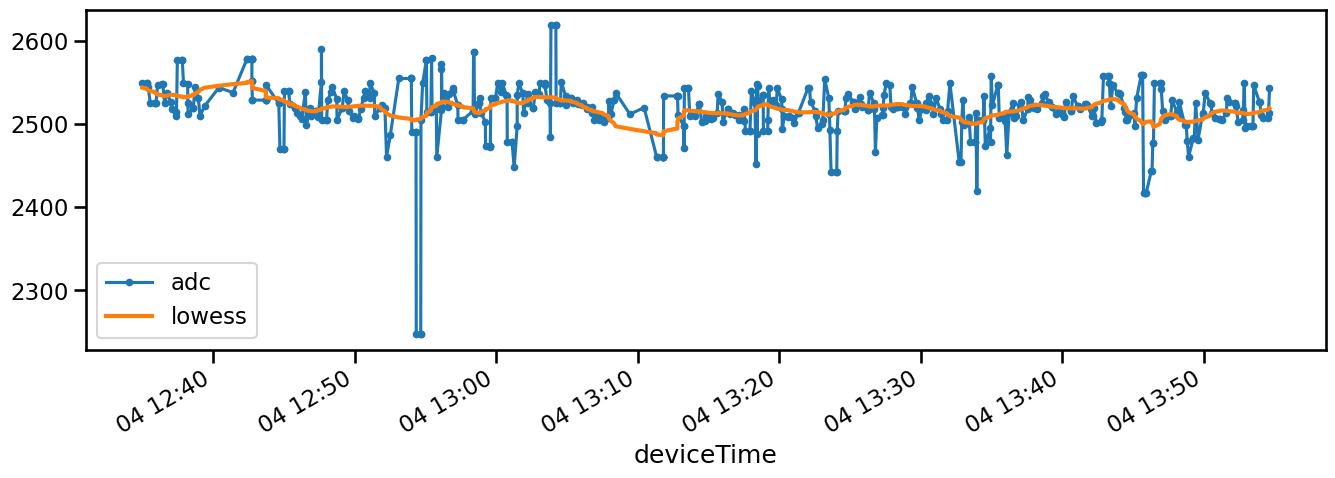

In [6]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.05, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

<AxesSubplot: title={'center': 'Total Distance'}, xlabel='deviceTime'>

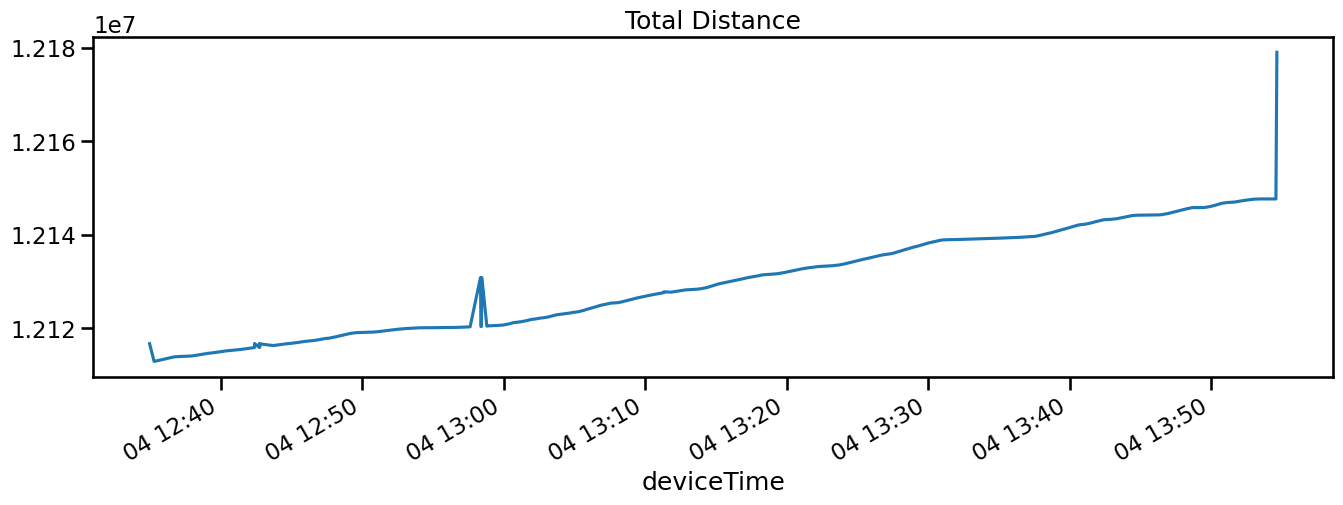

In [7]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Total Distance')
df['totalDistance'].plot()

<AxesSubplot: title={'center': 'Battery'}, xlabel='deviceTime'>

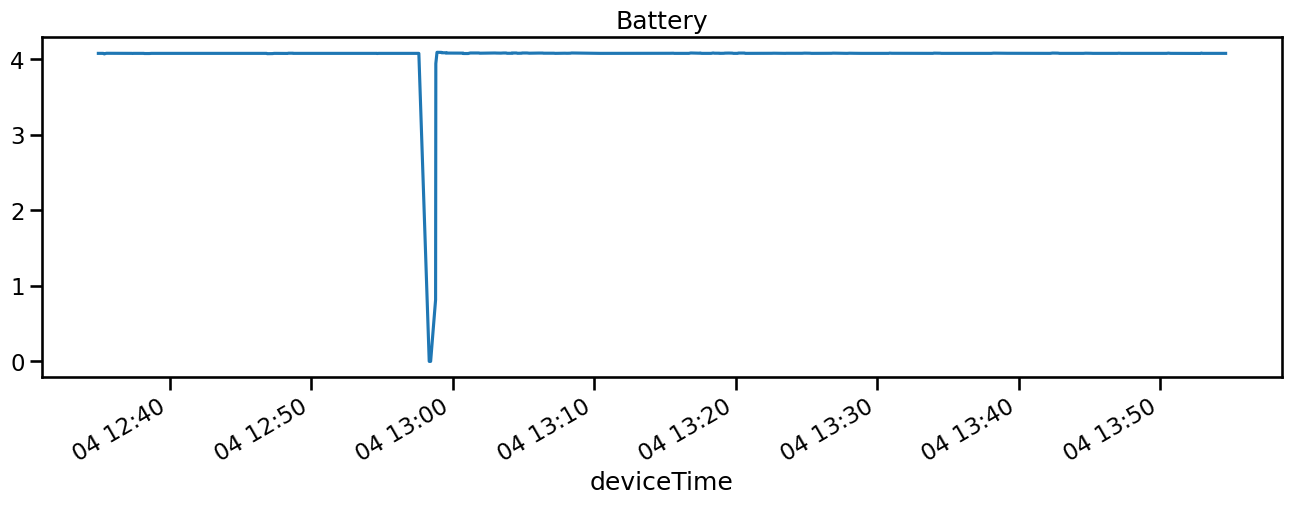

In [8]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Battery')
df['battery'].plot()

<AxesSubplot: title={'center': 'Power'}, xlabel='deviceTime'>

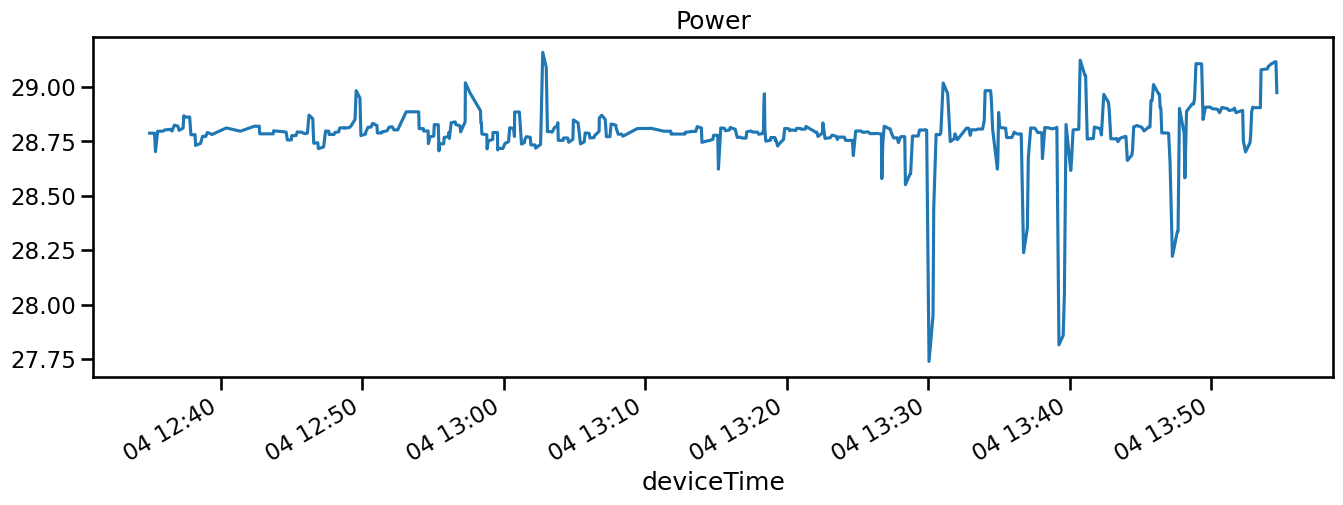

In [9]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Power')
df['power'].plot()

<AxesSubplot: title={'center': 'Speed'}, xlabel='deviceTime'>

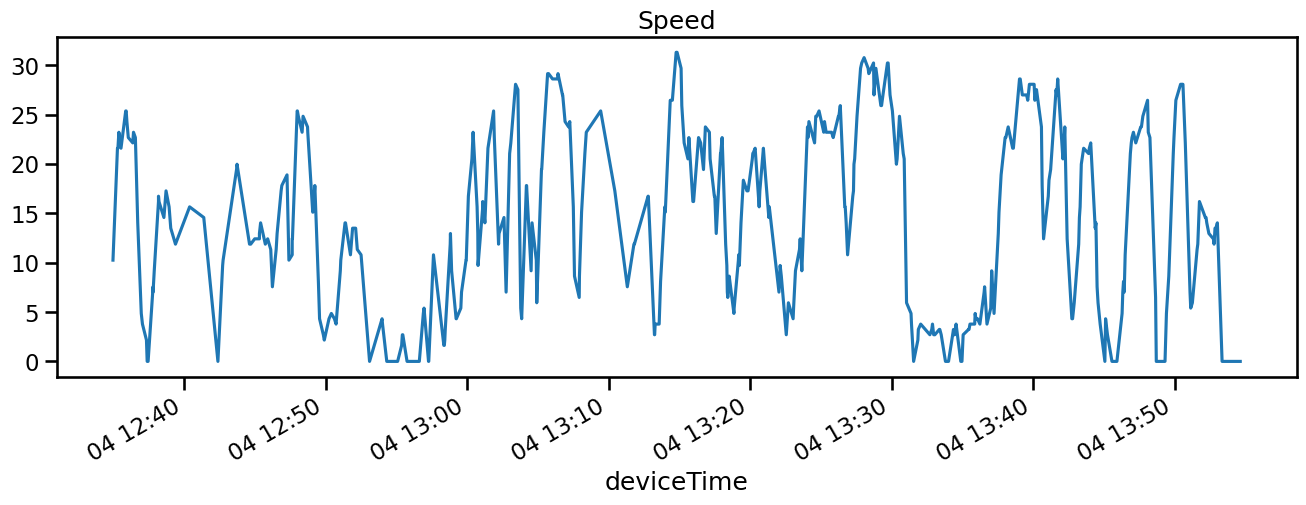

In [10]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Speed')
df['speed'].plot()

<AxesSubplot: xlabel='deviceTime'>

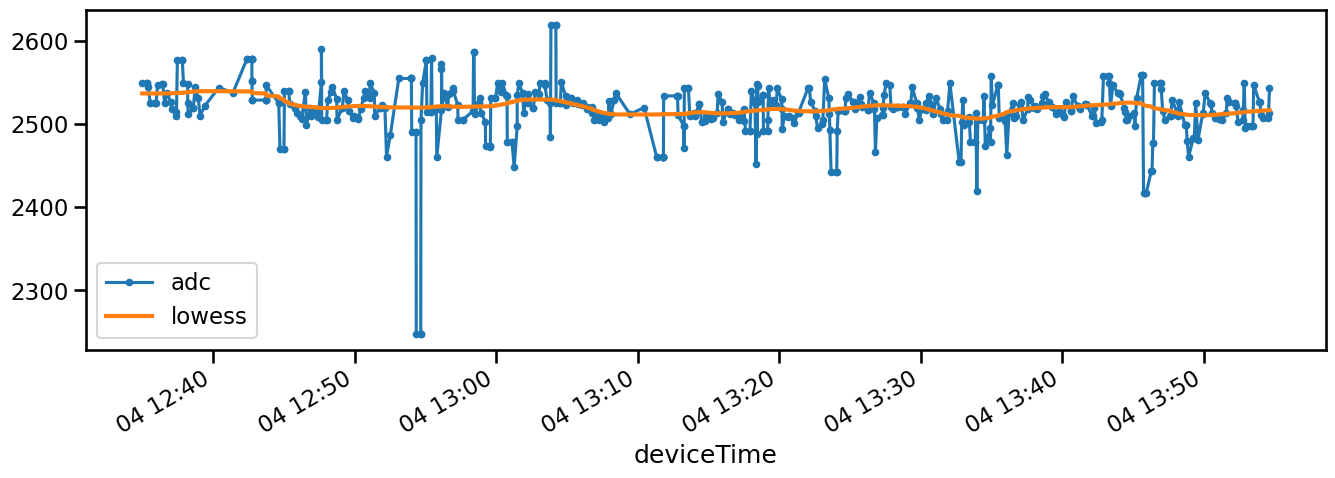

In [11]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.1, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

<AxesSubplot: xlabel='deviceTime'>

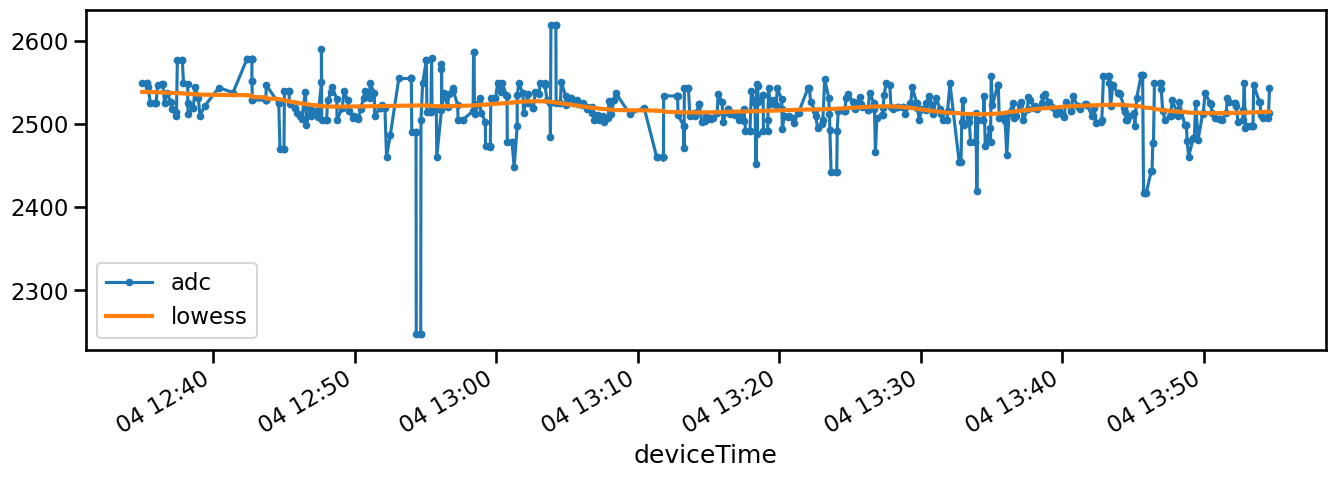

In [12]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.15, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

<AxesSubplot: xlabel='deviceTime'>

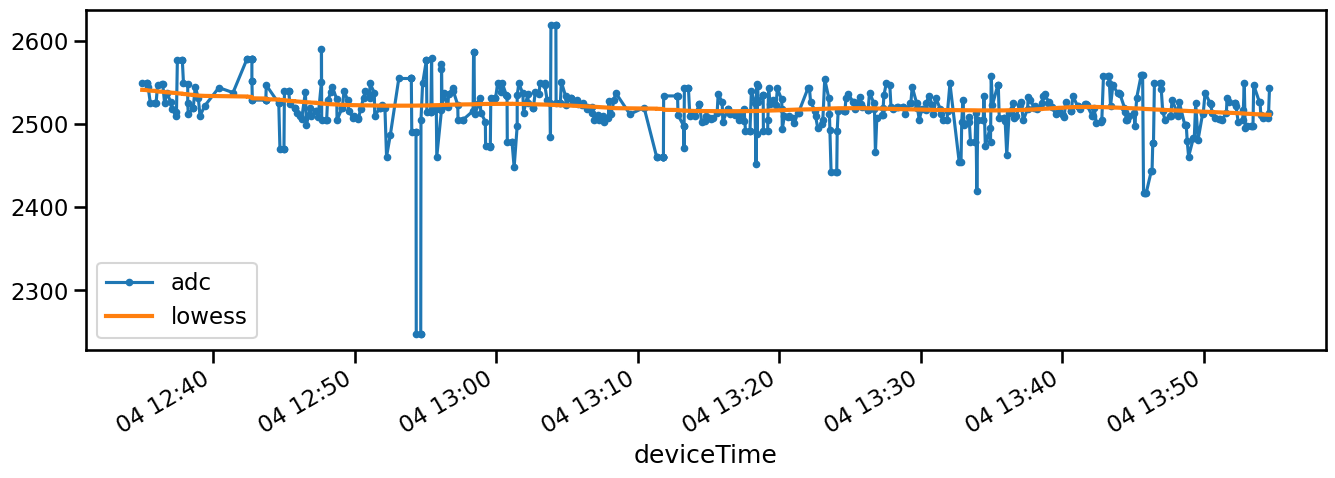

In [13]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.25, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

<AxesSubplot: xlabel='deviceTime'>

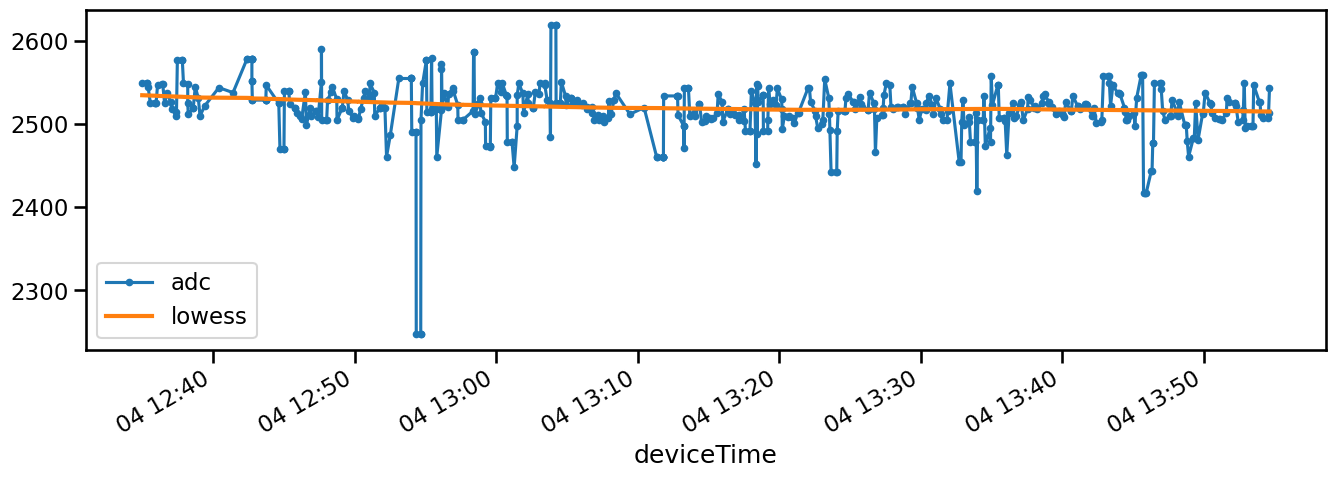

In [14]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.5, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

<AxesSubplot: xlabel='deviceTime'>

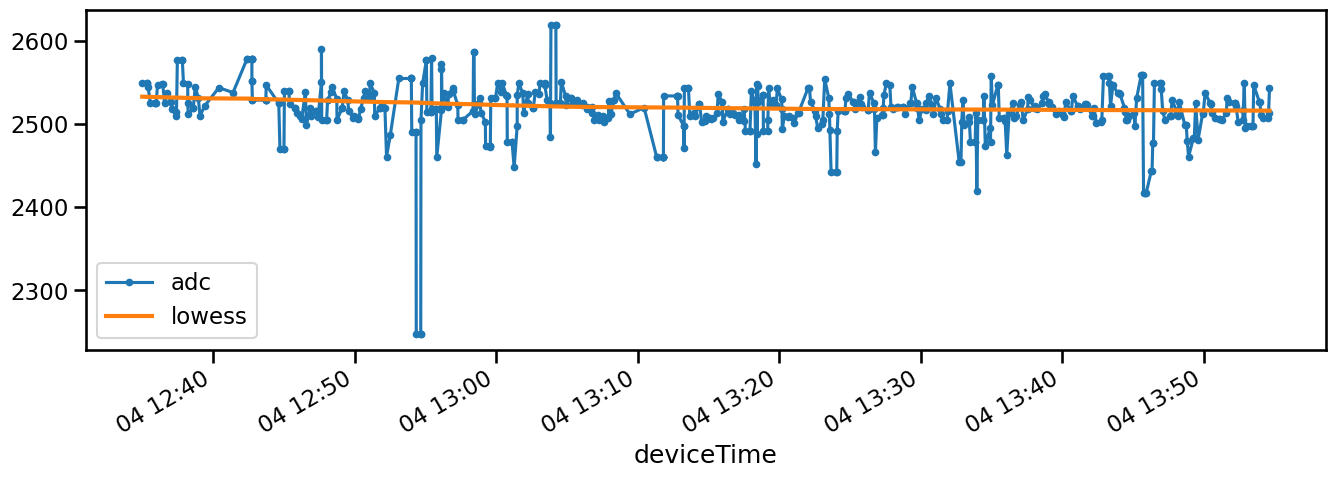

In [15]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.75, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

<AxesSubplot: xlabel='deviceTime'>

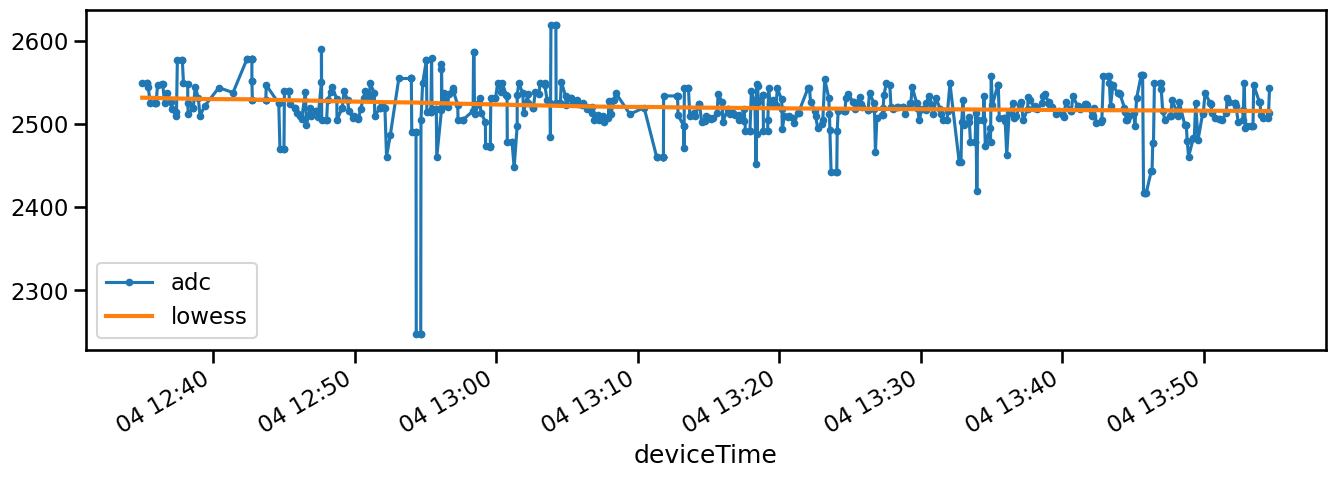

In [16]:
# The input of lowess need to be numpy arrays and numeric type

res = lowess(endog=y,  # the y values
             exog=x,   # the corresponding x values
             frac=0.9, # the fraction of the dataset to use in window
             it=3,     # Number of interations fo robust regression.
                       # The default value of 3 is typically good enough
            )
res[:10,]
df['lowess'] = res[:,1]

# Plot fit
fig, ax = plt.subplots(figsize=[16,5])
# df['adc'].plot()
df.plot(y='adc', marker='.', ax=ax)
df.plot(y='lowess', ax=ax, linewidth=3)

### K-Fold cross validation to select the frac parameter

In [17]:
from sklearn.model_selection import KFold


In [18]:
# Helper function to compute RMSE

def rmse(y,yhat):
    e = y - yhat
    return np.sqrt(np.mean(e**2))

In [19]:
cv_score_by_f = dict() # Initialize an empty dict to store results
X = np.arange(0, len(df), dtype=float)
y = df['adc'].values

for f in np.arange(0.05, 1.05, 0.05): # Scan over the values from 0.05 to 1
    cv_results = [] # Intialize list to store the result for each fold
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    for train_index, test_index in kfold.split(X,y):
        # Split the data
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        
        # Compute lowess fit
        y_pred = lowess(endog=y_train,  # the y values
                        exog=X_train,   # the corresponding x values
                        frac=f,         # the fraction of the dataset to use in window
                        it=3,           # Number of interations fo robust regression.
                        xvals=X_test,   # Return the fitted values only for specifi x values
                                   # The default value of 3 is typically good enough
                        )
        # Compute loss function
        loss = rmse(y_test, y_pred)
        cv_results.append(loss)
        
    # Compute average and standard error across all folds
    cv_score_mean = np.mean(cv_results)
    cv_score_by_f[f] = cv_score_mean
    
results = pd.Series(cv_score_by_f) # Convet results to pandas dataframe

In [20]:
results.head()

0.05    32.573351
0.10    33.224747
0.15    33.379931
0.20    33.464396
0.25    33.488033
dtype: float64

Text(0.5, 1.0, 'cross-val error')

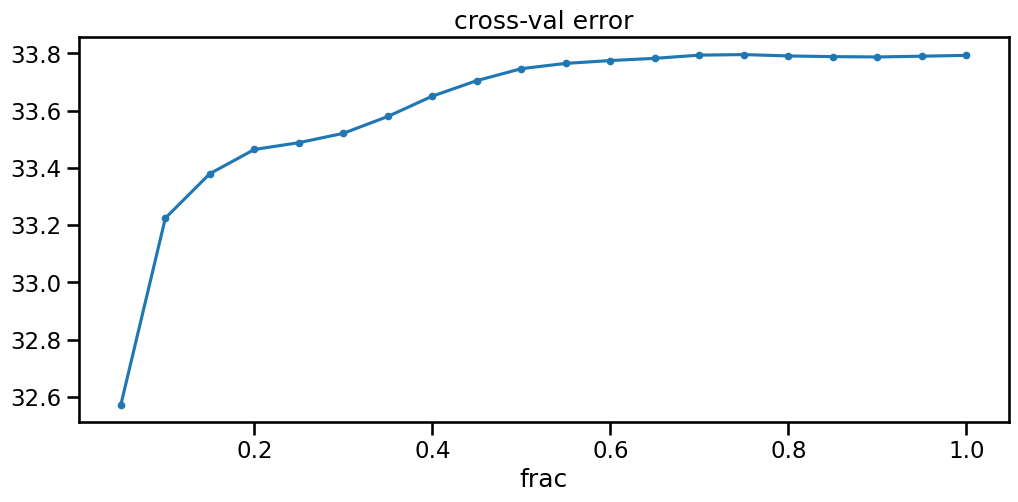

In [21]:
ax = results.plot(marker='.', figsize=[12,5])
ax.set_xlabel('frac')
ax.set_title('cross-val error')